<a href="https://colab.research.google.com/github/ljm524/esaa24-2/blob/main/esaa_hw1117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [개념정리]

## PART 04 합성곱 신경망(CNN)

### 01 합성곱 신경망

*   1-1 이미지 표현 : 숫자가 클수록 더 강한 특성
*   1-2 합성곱(Convolution) : 커널 이용
*   1-3 채널(channel) : 입력 이미지를 구성하는 2차원 배열의 개수
*   1-4 스트라이드(stride) : 커널의 이동 간격
*   1-5 패딩(padding) : 스트라이드 진행 시 특성맵의 사이즈가 줄어들기 때문에 이를 방지하기 위해 설정
*   1-6 특성맵(feature map) 사이즈 : (Output Height, Output Width) = ((Image Height + 2P - Kernel Height) / S + 1, (Image Height + 2P - Kernel Width) / S + 1)
1. Image Height, Image Width : 입력 크기(input size)
2. Kernel Height, Kernel Width : 필터 크기(kernel size)
3. S : 스트라이드(strides)
4. P : 패딩(padding)
5. Output Height, Output Width : 출력 크기(output size)
*   1-7 풀링(pooling) : 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어








### 02 간단한 모델 생성

*   2-1 데이터 로드 및 전처리
*   2-2 Sequential API로 모델 생성 및 학습
*   2-3 모델 구조 파악




### 03 복잡한 모델 생성

*   3-1 데이터셋 준비
*   3-2 Functional API로 다중 입력, 다중 출력 레이어 생성
*   3-3 다중 출력 분류 모델
*   3-4 전이 학습(Transfer Learning)




# [필사]

In [ ]:
!pip install --upgrade tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
# tensorflow 모듈 import
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
import matplotlib.pylab as plt

def plot_image(data,idx):
    plt.figure(figsize=(5,5))
    plt.imshow(data[idx],cmap="gray")
    plt.axis("off")
    plt.show()

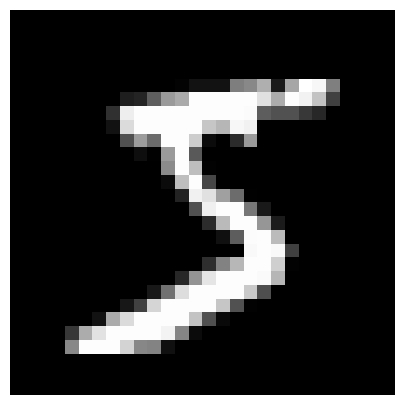

In [ ]:
plot_image(x_train,0)

In [ ]:
print(x_train.min(),x_train.max())
print(x_valid.min(),x_valid.max())

0 255
0 255


In [ ]:
# 정규화
x_train = x_train/255.0
x_valid = x_valid/255.0

print(x_train.min(),x_train.max())
print(x_valid.min(),x_valid.max())

0.0 1.0
0.0 1.0


In [ ]:
# 채널추가

print(x_train.shape,x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape,x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation="relu",
                          input_shape=(28,28,1),name="conv"),

    tf.keras.layers.MaxPooling2D((2,2),name="pool"),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation="softmax"),
])

In [ ]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

history = model.fit(x_train_in,y_train,
         validation_data=(x_valid_in,y_valid),
         epochs=10)

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.2097 - accuracy: 0.9412 - val_loss: 0.0836 - val_accuracy: 0.9749
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0784 - accuracy: 0.9773 - val_loss: 0.0710 - val_accuracy: 0.9785
Epoch 3/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0611 - accuracy: 0.9818 - val_loss: 0.0596 - val_accuracy: 0.9811
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0500 - accuracy: 0.9846 - val_loss: 0.0551 - val_accuracy: 0.9814
Epoch 5/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0426 - accuracy: 0.9871 - val_loss: 0.0530 - val_accuracy: 0.9832
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0368 - accuracy: 0.9887 - val_loss: 0.0540 - val_accuracy: 0.9829
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0315 - accuracy: 0.9906 - val_loss: 0.0603 -

In [ ]:
model.evaluate(x_valid_in,y_valid)

313/313 [==============================] - 2s 6ms/step - loss: 0.0667 - accuracy: 0.9811


[0.066744863986969, 0.9811000227928162]

In [ ]:
def plot_loss_acc(history, epoch):

    loss,val_loss = history.history["loss"],history.history["val_loss"]
    acc, val_acc = history.history["accuracy"], history.history["val_accuracy"]

    fig, axes = plt.subplots(1,2,figsize=(12,4))

    axes[0].plot(range(1,epoch+1), loss, label="Training")
    axes[0].plot(range(1,epoch+1), val_loss, label="Validation")
    axes[0].legend(loc="best")
    axes[0].set_title("Loss")

    axes[1].plot(range(1,epoch+1), acc, label="Training")
    axes[1].plot(range(1,epoch+1), val_acc, label="Validation")
    axes[1].legend(loc="best")
    axes[1].set_title("Accuracy")

    plt.show()

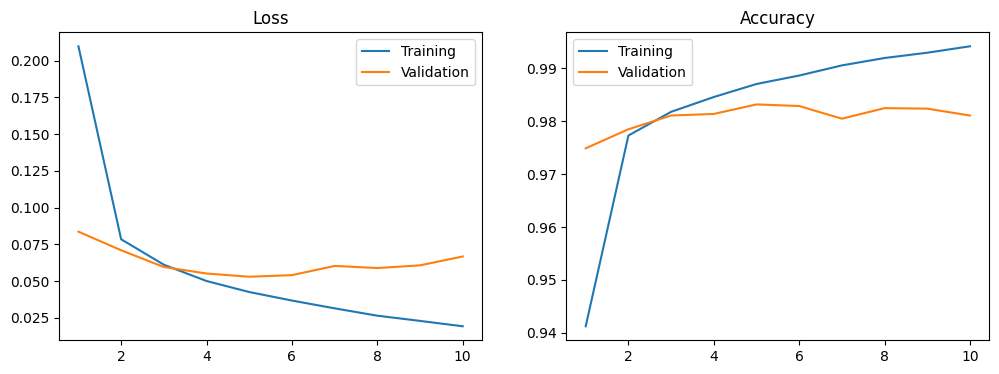

In [ ]:
plot_loss_acc(history,10)

In [ ]:
# 모델 구조
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [ ]:
# 출력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [ ]:
# 레이어
model.layers

In [ ]:
# 첫 번째 레이어 선택
model.layers[0]

In [ ]:
# 첫 번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [ ]:
# 첫 번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [ ]:
# 첫 번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[-1.4112931 ,  0.54379684, -0.0759203 , -0.4671101 ,
            0.13583522,  0.35876554,  0.00573116,  0.24237862,
           -0.25969008,  0.10425824, -0.8863376 , -0.15334879,
            0.38575524, -0.00703639,  0.07938173,  0.16516152,
           -0.66616845, -1.0483623 ,  0.23401515,  0.2938629 ,
            0.31185248, -0.09337556, -0.63458157, -0.06803701,
            0.12963352, -0.01765218,  0.22870141, -0.8500334 ,
            0.34775284,  0.24876262,  0.17795543, -0.22473992]],
 
         [[-0.8221421 ,  0.45132577,  0.3858282 , -0.76461667,
            0.25115085,  0.6059304 ,  0.28061178,  0.24859674,
           -0.04891121, -0.666399  , -0.6895826 ,  0.49200734,
            0.04484606, -0.60514796,  0.24605791,  0.1267171 ,
            0.06664146, -1.2221938 ,  0.06133654,  0.29875946,
            0.04046389,  0.14955187, -0.1443474 ,  0.43452355,
            0.10678546,  0.20910868, -0.52

In [ ]:
# 첫 번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-1.4112931 ,  0.54379684, -0.0759203 , -0.4671101 ,
           0.13583522,  0.35876554,  0.00573116,  0.24237862,
          -0.25969008,  0.10425824, -0.8863376 , -0.15334879,
           0.38575524, -0.00703639,  0.07938173,  0.16516152,
          -0.66616845, -1.0483623 ,  0.23401515,  0.2938629 ,
           0.31185248, -0.09337556, -0.63458157, -0.06803701,
           0.12963352, -0.01765218,  0.22870141, -0.8500334 ,
           0.34775284,  0.24876262,  0.17795543, -0.22473992]],

        [[-0.8221421 ,  0.45132577,  0.3858282 , -0.76461667,
           0.25115085,  0.6059304 ,  0.28061178,  0.24859674,
          -0.04891121, -0.666399  , -0.6895826 ,  0.49200734,
           0.04484606, -0.60514796,  0.24605791,  0.1267171 ,
           0.06664146, -1.2221938 ,  0.06133654,  0.29875946,
           0.04046389,  0.14955187, -0.1443474 ,  0.43452355,
           0.10678546,  0.20910868, -0.5209037 , -0.811728

In [ ]:
# 첫 번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([ 0.15433535,  0.05735036, -0.01376199, -0.10177927, -0.28485274,
       -0.0050797 , -0.05709376, -0.25097096, -0.2404398 , -0.18705375,
       -0.14658585, -0.00950556, -0.14873855, -0.08391565, -0.30998716,
       -0.22697333, -0.10704115,  0.00954682, -0.13699357, -0.17136595,
       -0.31400216, -0.2026903 , -0.04244582, -0.2662106 , -0.04520994,
       -0.11256725, -0.16991702,  0.05533311, -0.16768855, -0.04991547,
       -0.23473135, -0.05559628], dtype=float32)>

In [ ]:
# 레이어 이름 사용하여 레이어 선택
model.get_layer('conv')

In [ ]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가(첫 번째, 두 번째 레이어)
activator = tf.keras.Model(inputs=model.input,
                           outputs=[layer.output for layer in model.layers[:2]])
activations = activator.predict(x_train_in[0][tf.newaxis, ...])
len(activations)

1/1 [==============================] - 0s 130ms/step


2

In [ ]:
# 첫 번째 레이어(conv) 출력층
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

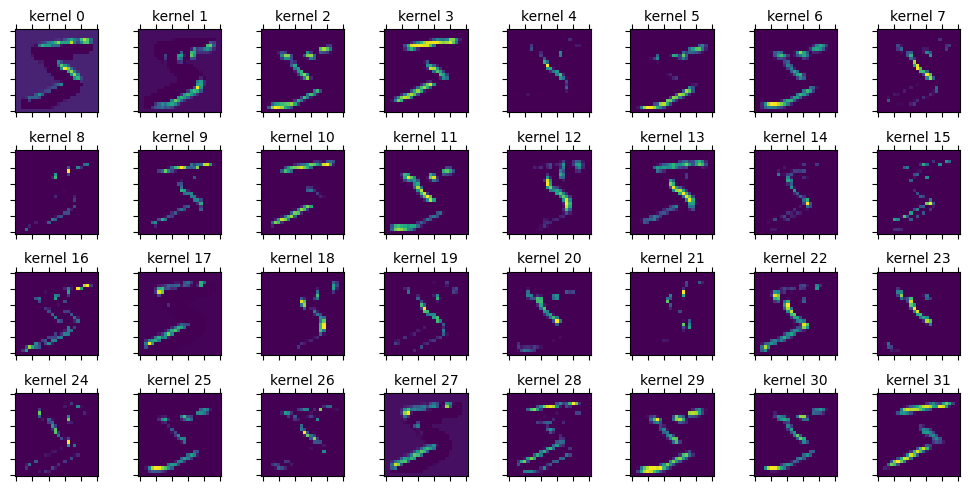

In [ ]:
# Convolution 시각화
fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
    axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i),fontsize=10)
    plt.setp(axes[i//8,i%8].get_xticklabels(),visible=False)
    plt.setp(axes[i//8,i%8].get_yticklabels(),visible=False)

plt.tight_layout()
plt.show()

In [ ]:
# 두 번째 레이어(pool) 출력층
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


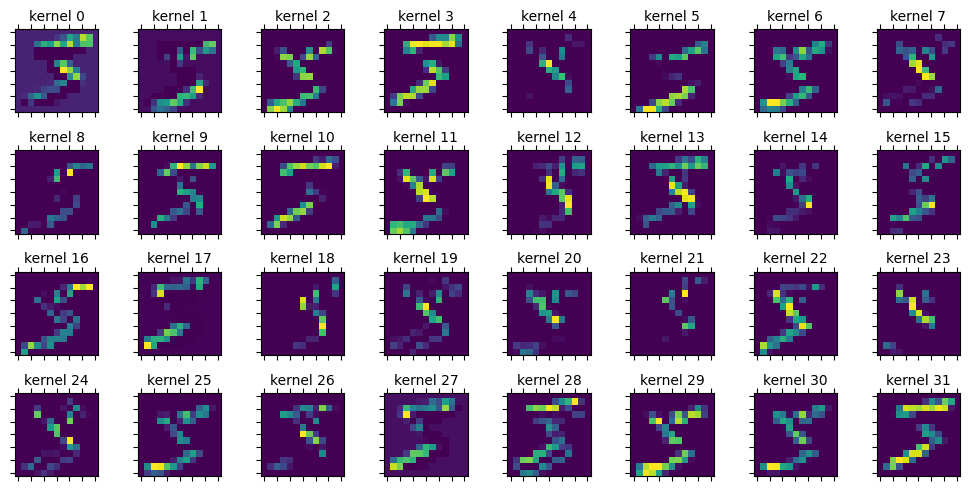

In [ ]:
# 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10,5)

for i in range(32):
    axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
# 새로운 출력 값 배열 생성(홀수 : 1, 짝수 : 0)
y_train_odd = []
for y in y_train:
    if y% 2 == 0:
        y_train_odd.append(0)
    else:
        y_train_odd.append(1)

y_train_odd = np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [ ]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [ ]:
# Validation 데이터셋 처리
y_valid_odd = []
for y in y_valid:
    if y% 2 ==0:
        y_valid_odd.append(0)
    else:
        y_valid_odd.append(1)

y_valid_odd = np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [ ]:
# 정규화(Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

# 채널 추가
x_train_in = tf.expand_dims(x_train, -1)
x_valid_in = tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
# Functional API를 사용하여 모델 생성

inputs = tf.keras.layers.Input(shape=(28, 28, 1))

conv = tf.keras.layers.Conv2D(32,(3,3), activation='relu')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2))(conv)
flat = tf.keras.layers.Flatten()(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs = tf.keras.layers.Dense(10, activation='softmax')(concat)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 26, 26, 32)           320       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 flatten_1 (Flatten)         (None, 5408)                 0         ['max_pooling2d[0][0]'] 

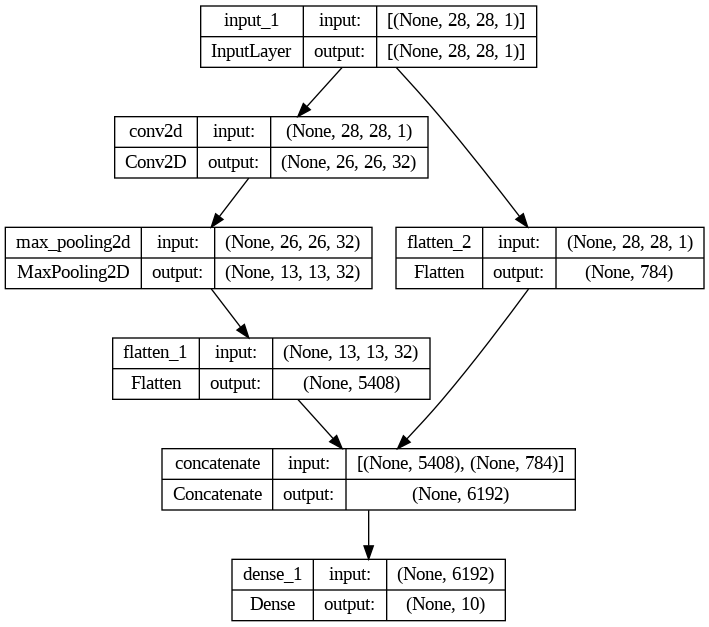

In [ ]:
# 모델 구조 출력 및 이미지 파일로 저장
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train,
                    validation_data=(x_valid_in, y_valid),
                    epochs=10)

# 모델 성능
val_loss, val_acc = model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2127 - accuracy: 0.9394 - val_loss: 0.0878 - val_accuracy: 0.9741
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0800 - accuracy: 0.9765 - val_loss: 0.0736 - val_accuracy: 0.9766
Epoch 3/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0607 - accuracy: 0.9819 - val_loss: 0.0616 - val_accuracy: 0.9814
Epoch 4/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0488 - accuracy: 0.9854 - val_loss: 0.0569 - val_accuracy: 0.9821
Epoch 5/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0415 - accuracy: 0.9871 - val_loss: 0.0540 - val_accuracy: 0.9833
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0349 - accuracy: 0.9893 - val_loss: 0.0534 - val_accuracy: 0.9836
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0296 - accuracy: 0.9908 - val_loss: 0.0539 -

In [ ]:
# Functional API를 사용해 모델 생성

inputs = tf.keras.layers.Input(shape=(28, 28, 1), name='inputs')

conv = tf.keras.layers.Conv2D(32,(3,3), activation='relu', name='conv2d_layer')(inputs)
pool = tf.keras.layers.MaxPooling2D((2,2), name='maxpool_layer')(conv)
flat = tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs = tf.keras.layers.Flatten()(inputs)
concat = tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs = tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model = tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs (InputLayer)         [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_layer (Conv2D)       (None, 26, 26, 32)           320       ['inputs[0][0]']              
                                                                                                  
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d_layer[0][0]']        
 D)                                                                                               
                                                                                                  
 flatten_layer (Flatten)     (None, 5408)                 0         ['maxpool_layer[0][0]'] 

In [ ]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


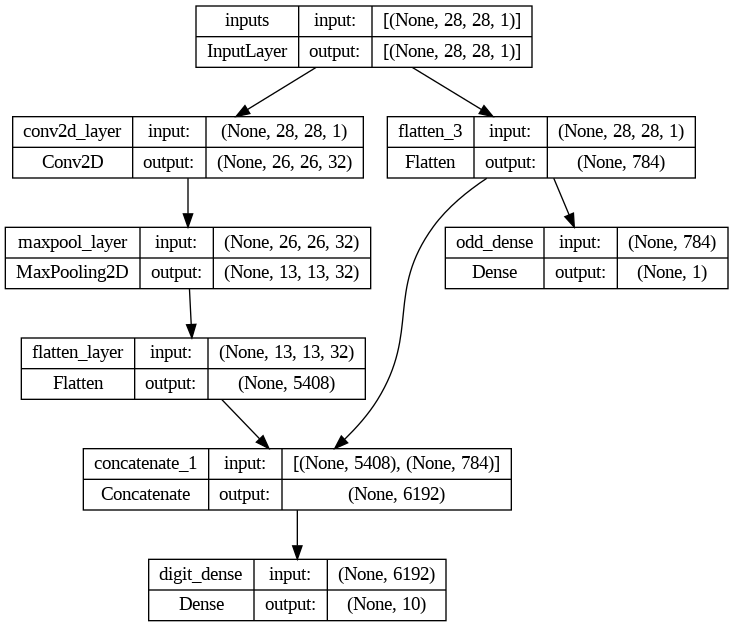

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss={'digit_dense':'sparse_categorical_crossentropy', 'odd_dense':'binary_crossentropy'},
              loss_weights={'digit_dense':1,'odd_dense':0.5},
              #loss = 1.0 * sparse_categorical_crossentropy + 0.5*binary_crossentropy
              metrics=['accuracy'])

#모델 훈련
history = model.fit({'inputs':x_train_in}, {'digit_dense':y_train, 'odd_dense':y_train_odd},
                    validation_data=({'inputs':x_valid_in}, {'digit_dense':y_valid,'odd_dense':y_valid_odd}), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.3665 - digit_dense_loss: 0.2041 - odd_dense_loss: 0.3249 - digit_dense_accuracy: 0.9427 - odd_dense_accuracy: 0.8645 - val_loss: 0.2248 - val_digit_dense_loss: 0.0874 - val_odd_dense_loss: 0.2748 - val_digit_dense_accuracy: 0.9732 - val_odd_dense_accuracy: 0.8901
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2148 - digit_dense_loss: 0.0790 - odd_dense_loss: 0.2716 - digit_dense_accuracy: 0.9767 - odd_dense_accuracy: 0.8909 - val_loss: 0.2000 - val_digit_dense_loss: 0.0682 - val_odd_dense_loss: 0.2636 - val_digit_dense_accuracy: 0.9790 - val_odd_dense_accuracy: 0.8972
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1923 - digit_dense_loss: 0.0609 - odd_dense_loss: 0.2628 - digit_dense_accuracy: 0.9810 - odd_dense_accuracy: 0.8963 - val_loss: 0.1927 - val_digit_dense_loss: 0.0628 - val_odd_dense_loss: 0.2599 - val_digit_dense_accuracy: 0.9794 -

In [ ]:
# 모델 성능
model.evaluate({'inputs': x_valid_in}, {'digit_dense': y_valid, 'odd_dense': y_valid_odd})

313/313 [==============================] - 3s 9ms/step - loss: 0.1879 - digit_dense_loss: 0.0599 - odd_dense_loss: 0.2559 - digit_dense_accuracy: 0.9829 - odd_dense_accuracy: 0.9015


[0.1878720074892044,
 0.05991291627287865,
 0.2559182941913605,
 0.9829000234603882,
 0.9014999866485596]

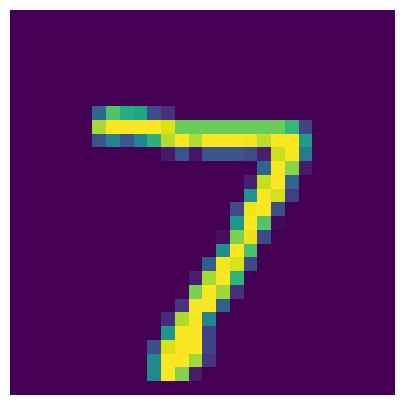

In [ ]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx])
    plt.axis("off")
    plt.show()

plot_image(x_valid, 0)

In [ ]:
digit_preds, odd_preds = model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 2s 5ms/step
[2.7190164e-13 2.0414576e-10 2.6530538e-09 7.1029376e-06 6.8523888e-11
 1.1248556e-12 6.7155918e-20 9.9999267e-01 1.1959209e-09 5.9277575e-08]
[0.999546]


In [ ]:
digit_labels = np.argmax(digit_preds, axis=-1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [ ]:
odd_labels = (odd_preds > 0.5).astype(np.int64).reshape(1,-1)[0]
odd_labels[0:10]

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

In [ ]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output = model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


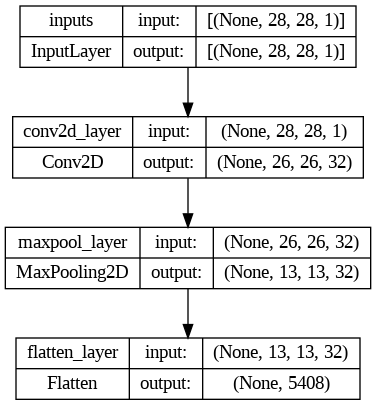

In [ ]:
plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

In [ ]:
# Sequential API 적용
digit_model = tf.keras.Sequential([base_model, tf.keras.layers.Dense(10, activation='softmax')])
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


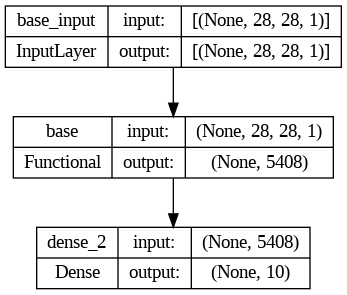

In [ ]:
plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

In [ ]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# 모델 훈련
history = digit_model.fit(x_train_in, y_train,
                          validation_data=(x_valid_in, y_valid),
                          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1292 - accuracy: 0.9633 - val_loss: 0.0599 - val_accuracy: 0.9809
Epoch 2/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0582 - accuracy: 0.9824 - val_loss: 0.0505 - val_accuracy: 0.9836
Epoch 3/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0450 - accuracy: 0.9868 - val_loss: 0.0507 - val_accuracy: 0.9837
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0360 - accuracy: 0.9887 - val_loss: 0.0544 - val_accuracy: 0.9838
Epoch 5/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0291 - accuracy: 0.9911 - val_loss: 0.0580 - val_accuracy: 0.9824
Epoch 6/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0241 - accuracy: 0.9930 - val_loss: 0.0500 - val_accuracy: 0.9847
Epoch 7/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0200 - accuracy: 0.9940 - val_loss: 0.0636 -

In [ ]:
# 베이스 모델의 가중치 고정(Freeze Model)

base_model_frozen = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable = False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


In [ ]:
# Functional API 적용
dense_output = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen = tf.keras.models.Model(inputs=base_model_frozen.input, outputs=dense_output)
digit_model_frozen.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [ ]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1167 - accuracy: 0.9685 - val_loss: 0.0581 - val_accuracy: 0.9838
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0491 - accuracy: 0.9853 - val_loss: 0.0531 - val_accuracy: 0.9841
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0367 - accuracy: 0.9884 - val_loss: 0.0519 - val_accuracy: 0.9837
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0274 - accuracy: 0.9915 - val_loss: 0.0576 - val_accuracy: 0.9825
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0228 - accuracy: 0.9931 - val_loss: 0.0517 - val_accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0187 - accuracy: 0.9942 - val_loss: 0.0594 - val_accuracy: 0.9819
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0155 - accuracy: 0.9955 - val_loss: 0.0568 - val_ac

In [ ]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정(Freeze Layer)
base_model_frozen2 = tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable = False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


In [ ]:
# Functional API 적용
dense_output2 = tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2 = tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [ ]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

# 모델 훈련
history = digit_model_frozen2.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1165 - accuracy: 0.9690 - val_loss: 0.0563 - val_accuracy: 0.9826
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0487 - accuracy: 0.9862 - val_loss: 0.0594 - val_accuracy: 0.9826
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0363 - accuracy: 0.9891 - val_loss: 0.0563 - val_accuracy: 0.9831
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0281 - accuracy: 0.9915 - val_loss: 0.0524 - val_accuracy: 0.9831
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0232 - accuracy: 0.9931 - val_loss: 0.0525 - val_accuracy: 0.9847
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0184 - accuracy: 0.9943 - val_loss: 0.0598 - val_accuracy: 0.9826
Epoch 7/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0145 - accuracy: 0.9957 - val_loss: 0.0560 - val_ac